In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

lower_bound, upper_bound = 0.8, 2.2
# ax.tick_params(which="minor", length=3)
plt.rcParams.update({'font.size': 14, "xtick.minor.size":6 })
marker = ["o", "s", "x"]
linestyle = ['-', '--','-.']
save = True
def new_figure(): 
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.set_size_inches(6,3)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(length=10)
    return fig, ax


In [120]:
# sns.lineplot( fc_mcf
#              , x="Demand Factor", y="Total Throughput", hue="Topology Programming")
# plt.title("Comcast, Multi-Commodity Flow, Flash Crowd TM")
# fc_mcf


def plot_congestion_tbe(fc_mcf, save=False):
    fc_mcf.sort_values('Demand Factor', inplace=True)
    fc_mcf.reset_index(inplace=True, drop=True)


    folder = '.' 
    name = "TBE-vs-GL-congestion.pdf"
    fig, ax = new_figure()

    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)
    def export_legend(legend, filename="legend.png"):
        fig  = legend.figure        
        fig.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(f"{folder}/plot/legend_{name}", dpi="figure", bbox_inches=bbox)

    cases = ["TBE", "TE", "GreyLambda"]
    for i, method in enumerate(cases):
        X = fc_mcf[fc_mcf["Topology Programming"] == method]["Demand Factor"]
        Y = fc_mcf[fc_mcf["Topology Programming"] == method]["Max Link Congestion"]
        new_X = [x for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        new_Y = [y for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        X, Y = new_X, new_Y
        ax.plot(X, Y, label = method , marker=marker[i % len(cases)], linestyle=linestyle[i % len(cases)])

    ax.set_xlabel("Demand Scale")
    ax.set_ylabel("Max Link Congestion")
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    # ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    # legend = ax.legend(framealpha=1, facecolor='black', facealpha=0, frameon=False, )
    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)

    export_legend(legend)
    legend.remove()
    # plt.title(title)
    # ax.set_xlim(0,100)
    fig.tight_layout()
    if save:
        fig.savefig("{}/plot/{}".format(folder, name))
    else:
        plt.show()

# sns.lineplot( fc_mcf
#              , x="Demand Factor", y="Total Throughput", hue="Topology Programming")
# plt.title("Comcast, Multi-Commodity Flow, Flash Crowd TM")
def plot_throughput_tbe(fc_mcf, save=False):
    fc_mcf.sort_values('Demand Factor', inplace=True)
    fc_mcf.reset_index(inplace=True, drop=True)


    folder = '.' 
    name = "TBE-vs-GL-throughput.pdf"
    fig, ax = new_figure()

    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)
    def export_legend(legend, filename="legend.png"):
        fig  = legend.figure        
        fig.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(f"{folder}/plot/legend_{name}", dpi="figure", bbox_inches=bbox)

    cases = ["TBE", "TE", "GreyLambda"]
    for i, method in enumerate(cases):
        X = fc_mcf[fc_mcf["Topology Programming"] == method]["Demand Factor"]
        Y = fc_mcf[fc_mcf["Topology Programming"] == method]["Total Throughput"]
        new_X = [x for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        new_Y = [y for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        X, Y = new_X, new_Y
        ax.plot(X, Y, label = method , marker=marker[i % len(cases)], linestyle=linestyle[i % len(cases)])
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_xlabel("Demand Scale")
    ax.set_ylabel("Total Throughput")
    # ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    # legend = ax.legend(framealpha=1, facecolor='black', facealpha=0, frameon=False, )
    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)

    export_legend(legend)
    legend.remove()
    # plt.title(title)
    # ax.set_xlim(0,100)
    fig.tight_layout()
    if save:
        fig.savefig("{}/plot/{}".format(folder, name))
    else:
        plt.show()


def plot_throughput_bvt(bvt_df, save=False):
    folder = '.' 
    name = "BVT-vs-GL-throughput.pdf"
    fig, ax = new_figure()

    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)
    def export_legend(legend, filename="legend.png"):
        fig  = legend.figure        
        fig.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(f"{folder}/plot/legend_{name}", dpi="figure", bbox_inches=bbox)

    cases = ["None (Optimal TE)", "BVT", "BVT+GreyLambda"]
    for i, method in enumerate(cases):
        X = bvt_df[bvt_df["Topology Programming"] == method]["Scale"]
        Y = bvt_df[bvt_df["Topology Programming"] == method]["Total Throughput"]
        new_X = [x for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        new_Y = [y for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        X, Y = new_X, new_Y

        ax.plot(X, Y, label = method , marker=marker[i % len(cases)], linestyle=linestyle[i % len(cases)])
    
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_xlabel("Demand Scale")
    ax.set_ylabel("Total Throughput")
    # ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    # legend = ax.legend(framealpha=1, facecolor='black', facealpha=0, frameon=False, )
    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)

    export_legend(legend)
    legend.remove()
    # plt.title(title)
    # ax.set_xlim(0,100)
    fig.tight_layout()
    fig.savefig("{}/plot/{}".format(folder, name))


def plot_congestion_bvt(bvt_df, save=False):
    folder = '.' 
    name = "BVT-vs-GL-congestion.pdf"
    fig, ax = new_figure()

    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)
    def export_legend(legend, filename="legend.png"):
        fig  = legend.figure        
        fig.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(f"{folder}/plot/legend_{name}", dpi="figure", bbox_inches=bbox)

    cases = ["None (Optimal TE)", "BVT", "BVT+GreyLambda"]
    for i, method in enumerate(cases):
        X = bvt_df[bvt_df["Topology Programming"] == method]["Scale"]
        Y = bvt_df[bvt_df["Topology Programming"] == method]["Max Link Congestion"]
        new_X = [x for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        new_Y = [y for (x, y) in zip(X, Y) if x >= lower_bound and x <= upper_bound]
        X, Y = new_X, new_Y
        
        ax.plot(X, Y, label = method , marker=marker[i % len(cases)], linestyle=linestyle[i % len(cases)])
    
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    
    ax.set_xlabel("Demand Scale")
    ax.set_ylabel("Max Link Congestion")
    # ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    # legend = ax.legend(framealpha=1, facecolor='black', facealpha=0, frameon=False, )
    legend = ax.legend(facecolor='white', framealpha=1, edgecolor='white', ncol=3)

    export_legend(legend)
    legend.remove()
    # plt.title(title)
    # ax.set_xlim(0,100)
    fig.tight_layout()
    fig.savefig("{}/plot/{}".format(folder, name))

In [121]:


# df = pd.read_csv("/home/mhall/topology-programming/data/reports/final.csv")
# df.head()
df = pd.read_csv("/home/mhall/topology-programming/data/reports/TBE.csv")
df.head()

,Network,Traffic,Demand Factor,Traffic Engineering,Topology Programming,Max Link Congestion,Total Loss,Total Throughput
0,Comcast,background,0.1,mcf,GreyLambda,0.1,0.0,1.0
1,Comcast,background,0.2,mcf,GreyLambda,0.2,0.0,1.0
2,Comcast,background,0.3,mcf,GreyLambda,0.3,0.0,1.0
3,Comcast,background,0.4,mcf,GreyLambda,0.4,0.0,1.0
4,Comcast,background,0.5,mcf,GreyLambda,0.5,0.0,1.0


In [122]:
# melt_df = df.melt(id_vars=['Traffic', 'Demand Factor', 'Traffic Engineering', 'Topology Programming'], 
#               value_vars=['Max Link Congestion', 'Total Loss', 'Total Throughput'])
# melt_df

In [123]:
bg_mcf = df[df["Traffic"]=="background" ]
bg_mcf = bg_mcf[bg_mcf["Traffic Engineering"] == "mcf"]

fc_mcf = df[df["Traffic"]=="background-plus-flashcrowd" ]
fc_mcf = fc_mcf[fc_mcf["Traffic Engineering"] == "mcf"]

bg_smore = df[df["Traffic"]=="background" ]
bg_smore = bg_smore[bg_smore["Traffic Engineering"] == "semimcfraekeft"]

fc_smore = df[df["Traffic"]=="background-plus-flashcrowd" ]
fc_smore = fc_smore[fc_smore["Traffic Engineering"] == "semimcfraekeft"]

In [124]:
# plt.title("Comcast, Multi-Commodity Flow, Gravity Model TM")
# sns.lineplot( bg_mcf
#              , x="Demand Factor", y="Total Throughput", hue="Topology Programming")
# # bg_mcf
fc_mcf.head()


,Network,Traffic,Demand Factor,Traffic Engineering,Topology Programming,Max Link Congestion,Total Loss,Total Throughput
15,Comcast,background-plus-flashcrowd,0.1,mcf,GreyLambda,0.266126,0.0,1.0
16,Comcast,background-plus-flashcrowd,0.2,mcf,GreyLambda,0.532252,0.0,1.0
17,Comcast,background-plus-flashcrowd,0.3,mcf,GreyLambda,0.798378,0.0,1.0
18,Comcast,background-plus-flashcrowd,0.4,mcf,GreyLambda,0.796099,0.0,1.0
19,Comcast,background-plus-flashcrowd,0.5,mcf,GreyLambda,0.895329,0.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

<Figure size 600x300 with 0 Axes>

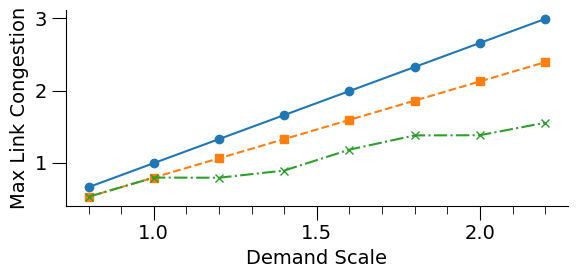

In [125]:
lower_bound, upper_bound = 0.8, 2.2

newdf = fc_mcf.copy()
newdf["Demand Factor"] += fc_mcf["Demand Factor"] + 0.4
plot_throughput_tbe(newdf, save=save)
plot_congestion_tbe(newdf, save=save)

In [126]:
newdf[newdf["Topology Programming"] == "GreyLambda"]

,Network,Traffic,Demand Factor,Traffic Engineering,Topology Programming,Max Link Congestion,Total Loss,Total Throughput
0,Comcast,background-plus-flashcrowd,0.6,mcf,GreyLambda,0.266126,0.000000,1.000000
3,Comcast,background-plus-flashcrowd,0.8,mcf,GreyLambda,0.532252,0.000000,1.000000
7,Comcast,background-plus-flashcrowd,1.0,mcf,GreyLambda,0.798378,0.000000,1.000000
9,Comcast,background-plus-flashcrowd,1.2,mcf,GreyLambda,0.796099,0.000000,1.000000
14,Comcast,background-plus-flashcrowd,1.4,mcf,GreyLambda,0.895329,0.000000,1.000000
15,Comcast,background-plus-flashcrowd,1.6,mcf,GreyLambda,1.184441,0.102393,0.897607
20,Comcast,background-plus-flashcrowd,1.8,mcf,GreyLambda,1.381848,0.207853,0.792147
23,Comcast,background-plus-flashcrowd,2.0,mcf,GreyLambda,1.384176,0.201878,0.798122
24,Comcast,background-plus-flashcrowd,2.2,mcf,GreyLambda,1.557198,0.285426,0.714574
29,Comcast,background-plus-flashcrowd,2.4,mcf,GreyLambda,1.730220,0.324096,0.675904


In [127]:
# sns.lineplot( fc_mcf
#              , x="Demand Factor", y="Total Throughput", hue="Topology Programming")
# plt.title("Comcast, Multi-Commodity Flow, Flash Crowd TM")
# fc_mcf


In [128]:
# sns.lineplot( bg_smore
#              , x="Demand Factor", y="Throughput", hue="Topology Programming")
# plt.title("Comcast, SMORE, Gravity Model TM")
# # bg_smore

In [129]:
# sns.lineplot( fc_smore
#              , x="Demand Factor", y="Throughput", hue="Topology Programming")
# plt.title("Comcast, SMORE, Flash Crowd TM")
# # fc_smore

In [130]:
bvt_df = pd.read_csv("/home/mhall/topology-programming/data/reports/bvt.csv")
bvt_df.sort_values('Scale', inplace=True)
bvt_df.reset_index(inplace=True, drop=True)

# sns.lineplot( fc_mcf
#              , x="Demand Factor", y="Throughput", hue="Topology Programming")
# plt.title("Comcast, Multi-Commodity Flow, Flash Crowd TM")
# # fc_mcf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

<Figure size 600x300 with 0 Axes>

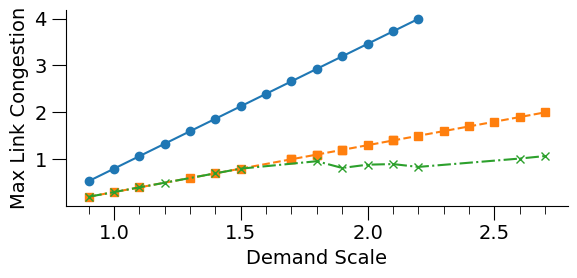

In [132]:
lower_bound, upper_bound = 0.8, 3.0
mpl.rc("Font", )
new_bvtdf = bvt_df.copy()
# new_bvtdf.head()
new_bvtdf["Scale"] += 0.7
plot_throughput_bvt(new_bvtdf, save=save)
plot_congestion_bvt(new_bvtdf, save=save)

In [136]:

new_bvtdf[new_bvtdf["Topology Programming"] == "BVT+GreyLambda"]

,Network,Traffic,Scale,TE Method,Topology Programming,Line Code,Max Link Congestion,Total Loss,Total Throughput
2,Comcast,background,0.8,mcf,BVT+GreyLambda,BVT,0.100000,0.000000,1.000000
4,Comcast,background,0.9,mcf,BVT+GreyLambda,BVT,0.200000,0.000000,1.000000
7,Comcast,background,1.0,mcf,BVT+GreyLambda,BVT,0.300000,0.000000,1.000000
10,Comcast,background,1.1,mcf,BVT+GreyLambda,BVT,0.400000,0.000000,1.000000
13,Comcast,background,1.2,mcf,BVT+GreyLambda,BVT,0.500000,0.000000,1.000000
17,Comcast,background,1.4,mcf,BVT+GreyLambda,BVT,0.700000,0.000000,1.000000
19,Comcast,background,1.5,mcf,BVT+GreyLambda,BVT,0.800000,0.000000,1.000000
28,Comcast,background,1.8,mcf,BVT+GreyLambda,BVT,0.958356,0.000000,1.000000
33,Comcast,background,1.9,mcf,BVT+GreyLambda,BVT,0.814604,0.000000,1.000000
36,Comcast,background,2.0,mcf,BVT+GreyLambda,BVT,0.884716,0.000000,1.000000
